In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
import string


In [2]:
pd.set_option('display.max_colwidth',-1) 

<ipython-input-2-bac2f3454903>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [3]:
df_train= pd.read_csv(r'C:\Users\gauri\Documents\natural\nlp-getting-started\train.csv')

In [49]:
df_test= pd.read_csv(r'C:\Users\gauri\Documents\natural\nlp-getting-started\test.csv')

In [5]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


#checking for class imbalances ,it looks like the data  well balanced, and accuracy classification models.

In [6]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [281]:
X_train.shape

(7613,)

In [7]:

wordnet=WordNetLemmatizer()
corpus_glove_vec = []
#sentences = nltk.sent_tokenize(paragraph)

def clean(doc) :
    sentences = nltk.sent_tokenize(doc)
    
    for i in range(len(sentences)):
        tweets = re.sub('[^a-zA-Z]', ' ', sentences[i])
        tweets =  tweets .lower()
        tweets  =  tweets .split()
        tweets = [wordnet.lemmatize(word) for word in  tweets if not word in set(stopwords.words('english'))]
        tweets = ' '.join( tweets )
        
        
        
    return  tweets 

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
df_train['text_cleaned'] = df_train['text'].apply(clean)

In [10]:
df_train['text_cleaned'] = df_train['text_cleaned'].apply(lambda x: re.sub(r'https?://\S+', '',x))

In [13]:
text1 = df_train.text_cleaned.values
#label = reviews.label.values

In [15]:
label = df_train.target.values

In [16]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
df_train.head()

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school


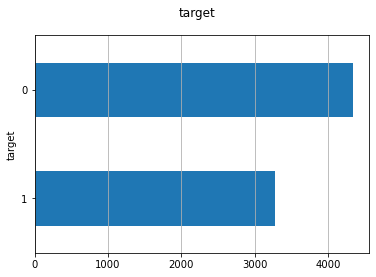

In [16]:
import matplotlib.pyplot as plt
x = "target"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
df_train[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

The dataset is balanced

In [17]:
import spacy

In [288]:
!python -m spacy download en_core_web_lg


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [11]:
## call model
ner = spacy.load("en_core_web_lg")
## tag text
txt = df_train['text_cleaned'].iloc[0]
doc = ner(txt)
## display result
#spacy.displacy.render(doc, style="ent")

NameError: name 'spacy' is not defined

In [ ]:
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token.text, token.pos_) for token in ner(string) if token.pos_=='PROPN'])

In [ ]:
def propn_count(text, model=ner):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_train['propn_count'] = df_train['text'].apply(propn_count)


In [12]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags
df_train['hash_count'] = df_train['text'].apply(hash_count)
#df_train['hash_count'] = test_df['text'].apply(hash_count)

In [13]:
df_train.head()

,id,keyword,location,text,target,text_cleaned,hash_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,2


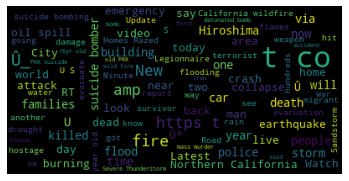

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

#y = "1"
#corpus = df_train[df_train["target"]==y]["text_cleaned"]
corpus = ' '.join(df_train[df_train['target'] ==1].text) #raw
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

#y = "1"
#corpus = df_train[df_train["target"]==y]["text_cleaned"]
corpus = ' '.join(df_train[df_train['target'] ==1].text_cleaned) #cleaned
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

BAG of WORDS and TF_IDF

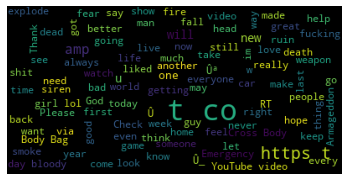

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)

corpus = ' '.join(df_train[df_train['target'] ==0].text)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [14]:
df_train['word_count'] = df_train["text"].apply(lambda x: len(str(x).split(" ")))
df_train['char_count'] = df_train["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_train['sentence_count'] = df_train["text"].apply(lambda x: len(str(x).split(".")))
df_train['avg_word_length'] = df_train['char_count'] / df_train['word_count']
df_train['avg_sentence_lenght'] = df_train['word_count'] / df_train['sentence_count']
df_train.head()

,id,keyword,location,text,target,text_cleaned,hash_count,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,1,13,57,1,4.384615,13.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,canada,0,7,32,2,4.571429,3.5
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation shelter place order expected,0,22,112,2,5.090909,11.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,1,9,57,1,6.333333,9.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,2,17,72,1,4.235294,17.0


In [ ]:
def propn_count(text, model=ner):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_train['propn_count'] = df_train['text'].apply(propn_count)

In [ ]:
df_train['text_cleaned'].str.contains('http://').any()

In [16]:
features = ['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 
            'propn_count','hash_count' ]

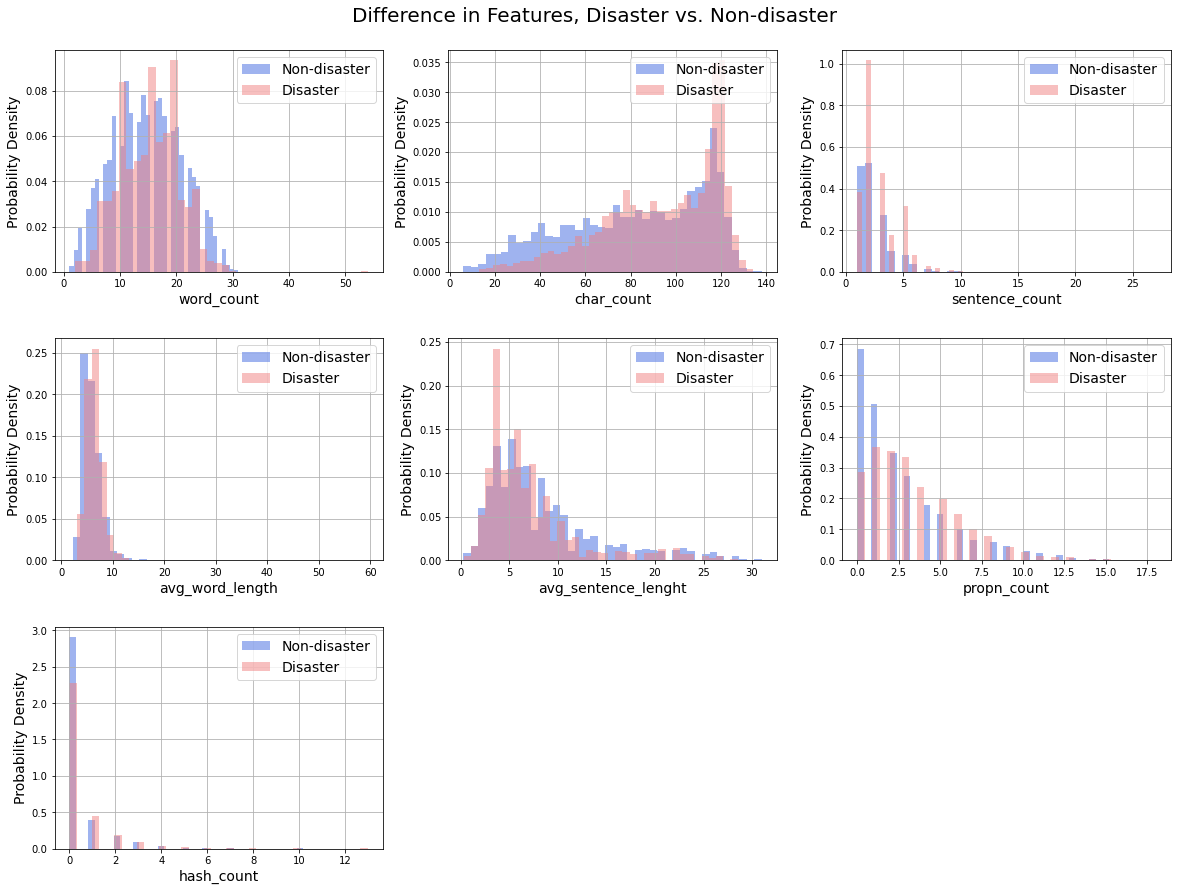

In [41]:
# create the figure
fig = plt.figure(figsize=(20, 20))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    ax =df_train[df_train['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = df_train[df_train['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()


#The http characters in the regex match the literal characters.

\S matches any character that is not a whitespace character. Notice that the S is uppercase.

The plus + matches the preceding character (any non-whitespace character) 1 or more times.

In [237]:
df_train.shape

(7613, 6)

In [31]:
 df_train['text_cleaned'].shape 

(7613,)

#Feature Engineering

In [35]:
X_train = df_train.text_cleaned

In [268]:
X_train.shape

(7613,)

In [267]:
y_train.shape

(7613,)

In [18]:
y_train = df_train['target']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
cv = CountVectorizer(ngram_range=(1, 2))

In [21]:
#Fit the training data and then return the matrix
X_train_bow = cv.fit_transform(df_train['text_cleaned']).toarray()

In [22]:

X_bow_df = pd.DataFrame(X_train_bow)

In [28]:
X_bow_df.shape

(7613, 57568)

In [23]:
X_features_bow = pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_bow_df], axis=1)

# check the shape
X_features_bow.shape

(7613, 57573)

In [24]:
y_train.shape

(7613,)

In [50]:
tfidf = TfidfVectorizer()
X_train_bow = cv.fit_transform(df_train['text_cleaned']).toarray()

KeyError: 'text_cleaned'

In [51]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(df_test['text_cleaned']).toarray()

KeyError: 'text_cleaned'

In [26]:
X_tf_idf = pd.DataFrame(X_train_tfidf)

In [27]:
X_features_tfidf = pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_tf_idf ], axis=1)

# check the shape
X_features_tfidf.shape

(7613, 57573)

In [28]:
X_training_tfidf, X_val, y, y_val = train_test_split(X_features_tfidf, y_train, shuffle = True, random_state = 123)

In [44]:
y_train.shape

(7613,)

In [29]:
X_training_bow, X_val, y_train, y_val = train_test_split(X_features_bow, y_train, shuffle = True, random_state = 123)

In [30]:
X_test = cv.transform(df_test['text']).toarray()

In [92]:
X_training_tfidf.shape

(5709, 57573)

In [46]:
X_training.shape

(5709, 57573)

In [31]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_training_bow, y_train)
predictions = model.predict(X_val)
predictions

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_training_tfidf, y_train)
prediction_tfidf = model.predict(X_val)
prediction_tfidf

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
y_train.value_counts()

0    3245
1    2464
Name: target, dtype: int64

In [87]:
y_train = df_train['target']

In [33]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_training_tfidf, y_train)
predictions = naive_bayes.predict(X_val)
predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [75]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(y_val, predictions , pos_label=1)
acc= accuracy_score(y_val,prediction_tfidf)

In [76]:
acc

0.7394957983193278

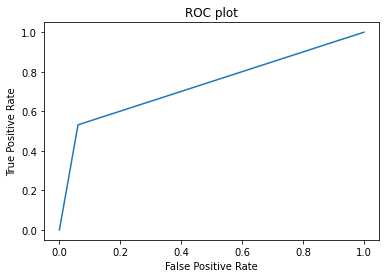

In [52]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(y_val, predictions , pos_label=1)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC plot")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
df_train['text_cleaned']

SGDClassifier

In [38]:
from sklearn.linear_model import SGDClassifier
import numpy as np

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class GloveVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name=ner):
        self._nlp = model_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.concatenate(
            [self._nlp(doc).vector.reshape(1, -1) for doc in X]
        )

In [44]:
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_core_web_lg"):
        self.model = model

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])

In [45]:
sgdc = SGDClassifier(max_iter=2, tol=0.01)

In [102]:
text_clf = Pipeline([
            ('vect', WordVectorTransformer()),
            ('clf', SGDClassifier()),
            ])

GLOVE

In [42]:
import spacy
ner = spacy.load("en_core_web_lg")
## tag text
#txt = df_train['text_cleaned'].iloc[0]
#doc = ner(txt)
## display result
#spacy.displacy.render(doc, style="ent")

In [72]:
texts = df_train["text_cleaned"].values
labels = df_train["target"].values

In [73]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [76]:
max_num_words = 1000
max_seq_length = 100

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[    0,     0,     0, ...,  2665,  5239,     3],
       [    0,     0,     0, ...,     0,     0,   849],
       [    0,     0,     0, ...,   652,   404,   967],
       ...,
       [    0,     0,     0, ...,     1,  5206,  5207],
       [    0,     0,     0, ...,    40,  2013,    90],
       [    0,     0,     0, ...,     1, 17619, 17620]])

In [75]:
len(word_index) 

17620

In [93]:
f = open(r'C:\Users\gauri\gensim-data\glove-wiki-gigaword-300\glove-wiki-gigaword-300.txt',encoding='utf-8')

In [91]:
embeddings_index = dict()

In [94]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400011 word vectors.


In [95]:
embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))
embedding_matrix.shape

(17621, 50)

In [98]:
embedding_matrix = np.zeros((len(word_index)+1, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [101]:
from sklearn.pipeline import Pipeline


In [35]:
X_train.head()

4996                                   http co vhmtytptgr
3263                                         boycottbears
4907                                   http co u r driuac
2855                                     http co fdzzumyw
4716    youngheroesid lava blast amp power red panther...
Name: text_cleaned, dtype: object

In [29]:

pipeline = make_pipeline(g, sgdc)

In [30]:
y_glove=df_train['target']

In [ ]:
sgdc.fit(text1, y_glove)

In [13]:
import os

In [ ]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [18]:
X_train = df_train.text_cleaned
y_train=df_train.target

In [55]:
X_features_tfidf = pd.concat([df_train[['word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght']],
                        X_tf_idf ], axis=1)

# check the shape
X_features_tfidf.shapehttp://localhost:8888/notebooks/weather_tweets.ipynb#

(7613, 57573)

Models after embedding showed better accuracy and hence recommended to do embedding on the columns